# Fuzzy c-means clustering
_María Camila Vásquez Correa_

### Necessary packages

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score as db
from sklearn.metrics import calinski_harabasz_score as ch
%matplotlib inline

In [33]:
random_seed = 0
rng = np.random.RandomState(random_seed)  # random_seed

## Data loading
We will load the data, the higher dimensional data and the embbeding

In [34]:
n1 = 150  # Number of samples
N1 = 4    # Number of features
i1 = load_iris().data.T
# Normalization
for i in range(N1):
    i1[i] = i1[i]/np.max(i1[i])
i1 = i1.T
ie = pd.read_csv('data/iris_embbeding.csv').values
i2 = pd.read_csv('data/high_dimension_iris.csv').values

In [35]:
n2 = 284807  # Number of samples
N2 = 29    # Number of features
c1 = pd.read_csv('data/creditcard.csv')
c1 = c1.drop('Time', axis=1)
c1 = c1.drop('Class', axis = 1)
c1 = c1.values.T
# Normalization
for i in range(N2):
    c1[i] = c1[i]/np.max(c1[i])
c1 = c1.T
ce = pd.read_csv('data/credit_embbeding.csv').values
c2 = pd.read_csv('data/credit_pca.csv').values

### Parameters

In [36]:
# Data
X = c2
N = 8
n = n2
Y = ce

In [37]:
# Parameters
k = 5
m = 2
previous_J, diff = np.inf, np.inf
epsilon = 0.005
n_iter = 1000
metric = 'cityblock'

## Clustering

In [38]:
# random initialization
U = rng.rand(k, n)
U = U / U.sum(axis=0)

In [39]:
def calculate_cluster(U, data):
    k = U.shape[0]
    Um = np.power(U, m)
    C = (Um @ data) / Um.sum(axis=1).reshape(k, 1)
    return C

In [40]:
def cost_function(U, data, clusters):
    Um = np.power(U, m)
    dist = cdist(clusters, data, metric = metric)
    J = np.sum(Um * dist)
    return J

In [41]:
def update_U(U, data, clusters):
    dist = cdist(clusters, data, metric = metric)
    n_clusters = len(clusters)
    d_ij = dist.reshape(n_clusters, 1, n)
    d_kj = dist.reshape(1, n_clusters, n)

    U = d_ij / d_kj
    U = np.power(U, 2 / (m - 1))
    U = U.sum(axis=1)
    U = 1 / U
    return U

In [42]:
# Ciclo principal
i = 0
while (diff > 0) & (previous_J > epsilon) & (i < n_iter):
    # Calculamos los clusters
    clusters = calculate_cluster(U,X)
    # Calculamos el costo
    J = cost_function(U, X, clusters)
    # Calculamos la matriz de pertenencia
    U = update_U(U, X, clusters)
    # Criterio de parada
    diff = previous_J - J
    previous_J = J
    i += 1

In [43]:
U = np.argmax(U, axis = 0)

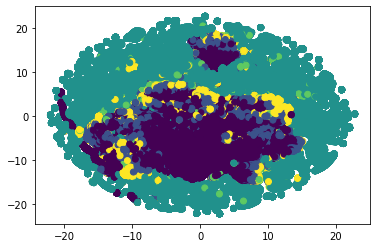

In [44]:
plt.scatter(Y[:, 0], Y[:, 1], c=U)
plt.show()